# Implementation of SARIMA for Temperature forecast

## Reading all the required libraries for plots/eda/model build/testing

In [2]:
import pandas as pd
import numpy as np
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import matplotlib.pyplot as plt

## Importing the data 

In [32]:
df = pd.read_csv("D:\Github_projects\Time Series- Sarima\MonthlyTemperatureData.csv")
df.rename(columns={'dt':'Month','LandAverageTemperature':'Temp'}, inplace=True)
print(df.dtypes)
df['Month']=pd.to_datetime(df['Month'])
print(df.dtypes)
df

Month     object
Temp     float64
dtype: object
Month    datetime64[ns]
Temp            float64
dtype: object


,Month,Temp
0,2000-01-01,2.950
1,2000-02-01,4.184
2,2000-03-01,6.219
3,2000-04-01,9.552
4,2000-05-01,11.874
...,...,...
187,2015-08-01,14.755
188,2015-09-01,12.999
189,2015-10-01,10.801
190,2015-11-01,7.433


## Exploratory data analysis 

#### The purpose of this step is to get familiar with the data and get the p,d,q values required to model the time series.We start by checking the stationarity of the time series - 2 ways to do this, either visually or via Augmented Dicky Fueller test


### Visual inspection of stationarity

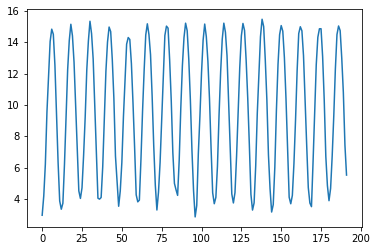

In [27]:
plt.plot(df.Temp)
#There is no trend in the data, we may not need trend differencing here

### Augmented Dicky Fueller test to confirm no differencing needed

In [28]:
from statsmodels.tsa.stattools import adfuller
test = adfuller(df.Temp.dropna())
print('P value: %f' % test[1] )
#the data does not need to be differenced since we can reject the null hypothesis around stationarity

P value: 0.003116


#### We will skip building the ACF as well as the PACF plot since we're going to implement autoarima here. To check how those are built and interpreted, please refer to the ARIMA modelling project on my github

## Building the model

### Splitting the model into train test split

In [33]:
train_df = df.loc[(df.Month>"2010-12-31") & (df.Month<="2014-12-31")]
test_df = df[df.Month>"2014-12-31"]
train_df = train_df.Temp
test_df = test_df.Temp
print(train_df)
print(test_df)

132     3.282
133     3.743
134     6.101
135     9.483
136    11.986
137    14.370
138    15.482
139    15.012
140    12.912
141    10.352
142     6.814
143     4.655
144     3.157
145     3.628
146     6.023
147     9.676
148    12.590
149    14.492
150    15.076
151    14.720
152    13.040
153    10.428
154     7.156
155     4.102
156     3.685
157     4.222
158     6.261
159     9.044
160    12.195
161    14.568
162    15.003
163    14.742
164    13.154
165    10.256
166     7.424
167     4.724
168     3.732
169     3.500
170     6.378
171     9.589
172    12.582
173    14.335
174    14.873
175    14.875
176    13.091
177    10.330
178     6.713
179     4.850
Name: Temp, dtype: float64
180     3.881
181     4.664
182     6.740
183     9.313
184    12.312
185    14.505
186    15.051
187    14.755
188    12.999
189    10.801
190     7.433
191     5.518
Name: Temp, dtype: float64


### Training the model

In [34]:
import pmdarima as pm

model = pm.auto_arima(train_df, test='adf', start_p=1, d= None, D= None, start_q=1, max_p=3, max_q= 3, start_P=1, start_Q=1, max_P=3, max_Q=3, max_D=2, m=12, seasonal=True
                    , trace=True,supress_warning=True, stepwise=True)
model.summary()

Performing stepwise search to minimize aic
 ARIMA(1,1,1)(1,1,1)[12]             : AIC=inf, Time=2.14 sec
 ARIMA(0,1,0)(0,1,0)[12]             : AIC=50.814, Time=0.02 sec
 ARIMA(1,1,0)(1,1,0)[12]             : AIC=43.545, Time=0.09 sec
 ARIMA(0,1,1)(0,1,1)[12]             : AIC=inf, Time=0.25 sec
 ARIMA(1,1,0)(0,1,0)[12]             : AIC=51.047, Time=0.02 sec
 ARIMA(1,1,0)(2,1,0)[12]             : AIC=43.323, Time=0.20 sec
 ARIMA(1,1,0)(3,1,0)[12]             : AIC=inf, Time=1.65 sec
 ARIMA(1,1,0)(2,1,1)[12]             : AIC=inf, Time=0.92 sec
 ARIMA(1,1,0)(1,1,1)[12]             : AIC=inf, Time=0.29 sec
 ARIMA(1,1,0)(3,1,1)[12]             : AIC=46.920, Time=1.77 sec
 ARIMA(0,1,0)(2,1,0)[12]             : AIC=46.520, Time=0.19 sec
 ARIMA(2,1,0)(2,1,0)[12]             : AIC=41.692, Time=0.41 sec
 ARIMA(2,1,0)(1,1,0)[12]             : AIC=42.145, Time=0.12 sec
 ARIMA(2,1,0)(3,1,0)[12]             : AIC=inf, Time=2.04 sec
 ARIMA(2,1,0)(2,1,1)[12]             : AIC=inf, Time=1.43 sec
 AR

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                                  y   No. Observations:                   48
Model:             SARIMAX(3, 1, 0)x(2, 1, 0, 12)   Log Likelihood                  -9.837
Date:                            Sun, 31 Oct 2021   AIC                             31.673
Time:                                    11:44:42   BIC                             41.006
Sample:                                         0   HQIC                            34.895
                                             - 48                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.6549      0.175     -3.746      0.000      -0.997      -0.312
ar.L2         -0.5942      0.232     -2.557      0.011      -1.050      -0.139
ar.L3         -0.5670      0.166     -3.417      0.001      -0.892      -0.242
ar.S.L12      -0.6607      0.229     -2.885      0.004      -1.110      -0.212
ar.S.L24      -0.4585      0.239     -1.917      0.055      -0.927       0.010
sigma2         0.0779      0.026      2.991      0.003       0.027       0.129
===================================================================================
Ljung-Box (L1) (Q):                   0.07   Jarque-Bera (JB):                 0.99
Prob(Q):                              0.79   Prob(JB):                         0.61
Heteroskedasticity (H):               0.72   Skew:                             0.13
Prob(H) (two-sided):                  0.58   Kurtosis:                         2.22
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

#### The PMDARIMA package gives us the best model fit by performing a grid search on all possible combinations of p,d,q(the trend lags, differencing and error term lag) as well as P,D,Q(The seasonal lags, differencing and error term lag)

### Forecasting and visually inspecting the forecast with actuals

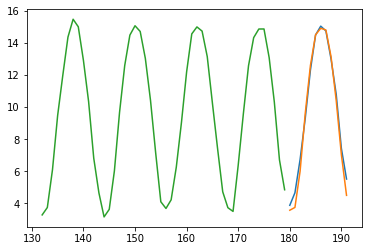

In [41]:
forecast = model.predict(12, alpha=0.05)
actuals_forecast = pd.Series(forecast, index = test_df.index)
plt.plot(test_df)
plt.plot(actuals_forecast)
plt.plot(train_df)

## Model Accuracy Measurement

#### We will do a couple of checks to see whether this is the model for us. We'll check: residual plots, MAPE

### Residual Plots

<AxesSubplot:ylabel='Density'>

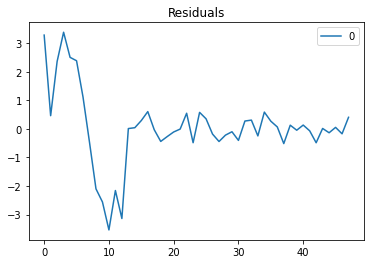

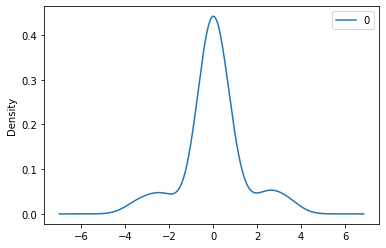

In [46]:
residuals = pd.DataFrame(model.resid())
residuals.plot(title = "Residuals")
residuals.plot(kind = 'kde')
## it looks like the model residuals are stationary as they are centered around 0

### MAPE Calculation

In [51]:
comparison = pd.concat([df[df.Month>"2014-12-31"],actuals_forecast], axis = 1)
comparison.rename(columns={0:'Predicted'}, inplace=True)
comparison

,Month,Temp,Predicted
180,2015-01-01,3.881,3.573933
181,2015-02-01,4.664,3.748601
182,2015-03-01,6.740,6.007598
183,2015-04-01,9.313,9.621679
184,2015-05-01,12.312,12.598249
185,2015-06-01,14.505,14.511591
186,2015-07-01,15.051,14.916205
187,2015-08-01,14.755,14.815106
188,2015-09-01,12.999,13.141942
189,2015-10-01,10.801,10.414061


In [53]:
mape = np.mean(np.abs(test_df-actuals_forecast)/np.abs(test_df))
mape
## We get a mape of 6%, meaning the model has a high accuracy of 94%(believable because the data is fairly simple to model)

0.0614884203945651